In [25]:
import tensorflow as tf
from tensorflow.keras import preprocessing
from sklearn.model_selection import train_test_split
import numpy as np
from Preprocess2 import Preprocess2
import matplotlib.pyplot as plt

In [26]:
gpus = tf.config.experimental.list_physical_devices('GPU')

if gpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)

In [27]:
# 학습 파일 불러오기

def read_file(file_name):
    sents = []
    with open(file_name, 'r', encoding='utf-8') as f:
        lines = f.readlines()
        
        for idx, l in enumerate(lines):
            if l[0] == ';' and lines[idx + 1][0] == '$':
                this_sent = []
            elif l[0] == '$' and lines[idx - 1][0] == ';':
                continue
            elif l[0] == '\n':
                sents.append(this_sent)
            else:
                this_sent.append(tuple(l.split('\t')))
    return sents

p = Preprocess2(word2index_dic='c:/2nd_project/Data/[최종] chatbot_dict.bin',
                userdic='c:/2nd_project/Data/ner_data/[최종] user_dic.txt')

In [28]:
# 학습용 말뭉치 데이터를 불러옴

corpus = read_file('c:/2nd_project/Data/ner_data/ner_train_최종.txt')

In [29]:
corpus[680]

[('1', '응응', 'IC', 'O\n'),
 ('2', '나', 'NP', 'O\n'),
 ('3', '는', 'JX', 'O\n'),
 ('4', '벼랑 위의 포뇨', 'NNG', 'B_MOVIE\n'),
 ('5', '를', 'JKO', 'O\n'),
 ('6', '젤', 'NNG', 'O\n'),
 ('7', '좋아하', 'VV', 'O\n'),
 ('8', 'ㅁ', 'ETN', 'O\n')]

In [30]:
# 말뭉치 데이터에서 단어와 BIO 태그만 불러와 학습용 데이터셋 생성

sentences, tags = [], []

for t in corpus:
    tagged_sentence = []
    sentence, bio_tag = [], []

    for w in t:
        tagged_sentence.append((w[1], w[3].replace('\n', '')))
        sentence.append(w[1].replace('\n', ''))
        bio_tag.append(w[3].replace('\n', ''))    
    sentences.append(sentence)
    tags.append(bio_tag)

In [31]:
tagged_sentence

[('나중', 'O'),
 ('에', 'O'),
 ('좋', 'O'),
 ('은', 'O'),
 ('영화', 'O'),
 ('추천', 'O'),
 ('하', 'O'),
 ('아', 'O'),
 ('주', 'O'),
 ('어', 'O')]

In [32]:
sentences

[['다', '들', '기생충', '보', '시', '었', '어요'],
 ['오스카', '상', '후보', '에', '오르', '았', '단', '소식', '듣', '고', '바로', '보', '았', '어요'],
 ['저',
  '는',
  '개인',
  '적',
  '으로',
  '다크',
  '한',
  '걸',
  'ㄹ',
  '안',
  '좋아하',
  '아서',
  '아직',
  '못',
  '보',
  '았',
  '어요'],
 ['음', '그렇', 'ㄹ', '수', '있', '죠'],
 ['봉준호',
  '감독',
  '이',
  '차기',
  '작',
  '을',
  '준비',
  '하',
  '고',
  '있',
  '다고',
  '하',
  '아서',
  '한',
  '번',
  '그냥',
  '물어보',
  '았',
  '어요',
  '하하'],
 ['오오', '차기', '작', '이', '요', '기대', '되', '는', '걸', '요'],
 ['정말', '요', '어떤', '내용', '이', '래요'],
 ['사실',
  '기생충',
  '이전',
  '부터',
  '준비',
  '하',
  '던',
  '시나리오',
  '이',
  'ㄴ데',
  '애니메이션',
  '으로',
  '제작',
  '되',
  'ㄹ',
  '예정',
  '이',
  '래요'],
 ['헉', '정말', '애니메이션', '이', '래요'],
 ['와우', '애니메이션', '이', '라니', '조금', '놀랍', '네요'],
 ['그쵸',
  '자신',
  '이',
  '디스크',
  '가',
  '있',
  '는',
  '주',
  'ㄹ',
  '알',
  '는',
  '무',
  '척추',
  '심해어',
  '와',
  '해양',
  '생물',
  '관련',
  '하',
  'ㄴ',
  '시나리오',
  '를',
  '이미',
  '완성',
  '하',
  '았',
  '다고',
  '하',
  '더라고요'],
 ['기생충', '이후', '로', '2

In [33]:
tags

[['O', 'O', 'B_MOVIE', 'O', 'O', 'O', 'O'],
 ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O'],
 ['O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O'],
 ['O', 'O', 'O', 'O', 'O', 'O'],
 ['B_DIR',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O'],
 ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O'],
 ['O', 'O', 'O', 'O', 'O', 'O'],
 ['O',
  'B_MOVIE',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'B_GEN',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O'],
 ['O', 'O', 'B_GEN', 'O', 'O'],
 ['O', 'B_GEN', 'O', 'O', 'O', 'O', 'O'],
 ['O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O',
  'O'],
 ['B_MOVIE', 'O', 'O', 'O', 'O', 'O'],
 ['B_GEN', 'O', 'O', 'O', 'O', 'O', 'O', 'O',

In [34]:
filtered_tags_with_indices = [(index, tag_list) for index, tag_list in enumerate(tags) if '포뇨' in tag_list]
print(filtered_tags_with_indices)

[]


In [35]:
print("샘플 크기 : ", len(sentences))
print("0번째 샘플 시퀀스 길이 : ", len(sentences[0]))
print("0번째 샘플 단어 시퀀스 : \n\t", sentences[0])
print("0번째 샘플 bio 태그 : \n\t", tags[0])
print("샘플 단어 시퀀스 최대 길이 :", max(len(l) for l in sentences))
print("샘플 단어 시퀀스 평균 길이 :", (round(sum(map(len, sentences))/len(sentences),2)))

샘플 크기 :  83122
0번째 샘플 시퀀스 길이 :  7
0번째 샘플 단어 시퀀스 : 
	 ['다', '들', '기생충', '보', '시', '었', '어요']
0번째 샘플 bio 태그 : 
	 ['O', 'O', 'B_MOVIE', 'O', 'O', 'O', 'O']
샘플 단어 시퀀스 최대 길이 : 76
샘플 단어 시퀀스 평균 길이 : 9.72


In [36]:
num_sentences = [len(sentence) for sentence in sentences]
num_sentences = np.array(num_sentences)
num_sentences

array([ 7, 14, 17, ...,  5,  6, 10])

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from konlpy.tag import Komoran
import matplotlib.pyplot as plt

# 평균값, 최댓값, 표준편차
print(f"토큰 길이 평균: {round(np.mean(num_sentences),2)}")
print(f"토큰 길이 최대: {np.max(num_sentences)}")
print(f"토큰 길이 표준편차: {round(np.std(num_sentences),2)}")

토큰 길이 평균: 9.72
토큰 길이 최대: 76
토큰 길이 표준편차: 4.77


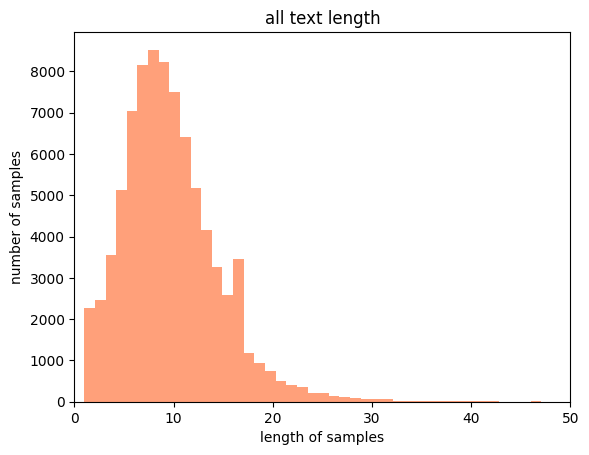

In [38]:
plt.title('all text length')
plt.hist(num_sentences, bins=70, color='lightsalmon')
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.xlim(0,50)
plt.show()

In [39]:
select_length = 30

def below_threshold_len(max_len, nested_list):
    cnt = 0
    for s in nested_list:
        if(len(s) <= max_len):
            cnt = cnt + 1
        
    print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s%%'%(max_len, round((cnt / len(nested_list))*100,4)))
    
below_threshold_len(select_length, sentences)

전체 샘플 중 길이가 30 이하인 샘플의 비율: 99.7197%


In [40]:
# 토크나이저 정의

tag_tokenizer = preprocessing.text.Tokenizer(lower=False) 

tag_tokenizer.fit_on_texts(tags)

In [41]:
tag_tokenizer.word_index

{'O': 1,
 'B_MOVIE': 2,
 'B_ACT': 3,
 'B_GEN': 4,
 'B_NAT': 5,
 'B_DIR': 6,
 'B_DT': 7,
 'B_RAT': 8}

In [42]:
# 단어사전 및 태그 사전 크기

vocab_size = len(p.word_index) + 1
tag_size = len(tag_tokenizer.word_index) + 1

print("BIO 태그 사전 크기 :", tag_size)
print("단어 사전 크기 :", vocab_size)

BIO 태그 사전 크기 : 9
단어 사전 크기 : 96121


In [43]:
# 학습용 단어 시퀀스 생성

x_train = [p.get_wordidx_sequence(sent) for sent in sentences]
y_train = tag_tokenizer.texts_to_sequences(tags)

index_to_ner = tag_tokenizer.index_word # 시퀀스 인덱스를 NER로 변환 하기 위해 사용
index_to_ner[0] = 'PAD'

In [44]:
index_to_ner

{1: 'O',
 2: 'B_MOVIE',
 3: 'B_ACT',
 4: 'B_GEN',
 5: 'B_NAT',
 6: 'B_DIR',
 7: 'B_DT',
 8: 'B_RAT',
 0: 'PAD'}

In [45]:
# 시퀀스 패딩 처리

max_len = 30

x_train = preprocessing.sequence.pad_sequences(x_train, padding='post', maxlen=max_len)
y_train = preprocessing.sequence.pad_sequences(y_train, padding='post', maxlen=max_len)

In [46]:
print(len(x_train[0]))
x_train[0]

30


array([  23,   24, 3775,   18,   15,   20,   29,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0])

In [47]:
print(len(y_train[0]))
y_train[0]

30


array([1, 1, 2, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [48]:
# 학습 데이터와 테스트 데이터를 8:2의 비율로 분리

x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=1234)

In [49]:
# 출력 데이터를 one-hot encoding

y_train = tf.keras.utils.to_categorical(y_train, num_classes=tag_size)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=tag_size)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(66497, 30)
(66497, 30, 9)
(16625, 30)
(16625, 30, 9)


In [50]:
# CPU에서 실행

# import tensorflow as tf
# with tf.device('/:CPU0'):
#     model.fit(X_train_t, y_train, epochs=250, batch_size=64, verbose=1)

# GPU에서 실행
# import tensorflow as tf
# with tf.device('/:GPU0'):

In [32]:
# 모델 정의 (Bi-LSTM)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Embedding, Dense, TimeDistributed, Dropout, Bidirectional
from tensorflow.keras.optimizers import Adam

# GPU에서 실행
import tensorflow as tf
with tf.device('/:GPU0'):
    model = Sequential()
    model.add(Embedding(input_dim=vocab_size, output_dim=30, input_length=max_len, mask_zero=True))
    # 양방향 LSTM
    model.add(Bidirectional(LSTM(200, return_sequences=True, dropout=0.50, recurrent_dropout=0.25)))

    # 스텝별로 cost 계산, 스텝별로 역전파(최종 스텝에서 역전파되는 것이 아님)
    model.add(TimeDistributed(Dense(tag_size, activation='softmax')))
    model.compile(loss='categorical_crossentropy', optimizer=Adam(0.01), metrics=['accuracy'])
    model.fit(x_train, y_train, batch_size=128, epochs=3)

Epoch 1/3
520/520 [==============================] - 142s 264ms/step - loss: 0.0152 - accuracy: 0.9904
Epoch 2/3
520/520 [==============================] - 126s 243ms/step - loss: 0.0020 - accuracy: 0.9981
Epoch 3/3
520/520 [==============================] - 133s 255ms/step - loss: 0.0016 - accuracy: 0.9983


In [33]:
model.save('c:/2nd_project/Model/ner_model/ner_model_0828_a_ep(3).h5')

In [51]:
from tensorflow import keras

model = keras.models.load_model('c:/2nd_project/Model/ner_model/ner_model_0828_a_ep(2).h5')

print("평가 결과 : ", round(model.evaluate(x_test, y_test)[1],4))

# 시퀀스를 NER 태그로 변환
def sequences_to_tag(sequences):  # 예측값을 index_to_ner를 사용하여 태깅 정보로 변경하는 함수.
    result = []

    for sequence in sequences:  # 전체 시퀀스로부터 시퀀스를 하나씩 꺼낸다.
        temp = []
        for pred in sequence:  # 시퀀스로부터 예측값을 하나씩 꺼낸다.
            pred_index = np.argmax(pred)  # 예를 들어 [0, 0, 1, 0 ,0]라면 1의 인덱스인 2를 리턴한다.
            temp.append(index_to_ner[pred_index].replace("PAD", "O"))  # 'PAD'는 'O'로 변경
        result.append(temp)
    return result

520/520 [==============================] - 23s 40ms/step - loss: 0.0021 - accuracy: 0.9981
평가 결과 :  0.9981


In [52]:
# f1 스코어 계산을 위해 사용

from seqeval.metrics import f1_score, classification_report

# 테스트 데이터셋의 NER 예측

y_predicted = model.predict(x_test)

pred_tags = sequences_to_tag(y_predicted) # 예측된 NER
test_tags = sequences_to_tag(y_test)    # 실제 NER

# F1 평가 결과
print(classification_report(test_tags, pred_tags))
print("F1-score: {:.1%}".format(f1_score(test_tags, pred_tags)))

520/520 [==============================] - 20s 38ms/step


c:\Python3.9.13\lib\site-packages\seqeval\metrics\sequence_labeling.py:171: UserWarning: B_MOVIE seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
c:\Python3.9.13\lib\site-packages\seqeval\metrics\sequence_labeling.py:171: UserWarning: B_ACT seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
c:\Python3.9.13\lib\site-packages\seqeval\metrics\sequence_labeling.py:171: UserWarning: B_NAT seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
c:\Python3.9.13\lib\site-packages\seqeval\metrics\sequence_labeling.py:171: UserWarning: B_GEN seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
c:\Python3.9.13\lib\site-packages\seqeval\metrics\sequence_labeling.py:171: UserWarning: B_DT seems not to be NE tag.
  warnings.warn('{} seems not to be NE tag.'.format(chunk))
c:\Python3.9.13\lib\site-packages\seqeval\metrics\sequence_labeling.py:171: UserWarning: B_DIR seems not

              precision    recall  f1-score   support

        _ACT       1.00      0.92      0.96       939
        _DIR       1.00      0.89      0.94       131
         _DT       0.99      0.97      0.98       119
        _GEN       1.00      0.99      0.99       725
      _MOVIE       0.99      0.88      0.93      1635
        _NAT       1.00      1.00      1.00       336
        _RAT       1.00      0.50      0.67         2

   micro avg       1.00      0.92      0.96      3887
   macro avg       1.00      0.88      0.92      3887
weighted avg       1.00      0.92      0.96      3887

F1-score: 95.8%
